<a href="https://colab.research.google.com/github/JOEL1706/data-Science/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
data=pd.read_csv('/content/Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#Data pre-proccesing


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
data[data.duplicated()].shape

(0, 18)

In [ ]:
data.drop(['animal name'],axis=1,inplace=True)


In [ ]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
data[data.duplicated()]

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
8,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
10,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
20,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
22,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
28,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
31,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data[data.duplicated()].shape

(0, 17)

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
5,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
6,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
7,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
9,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7


<Axes: >

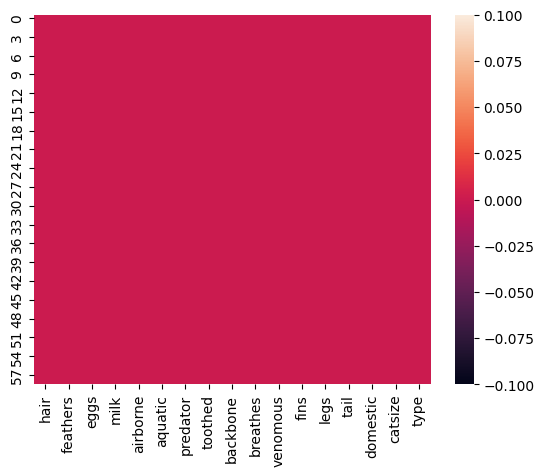

In [ ]:
sns.heatmap(data[data.columns].isnull())

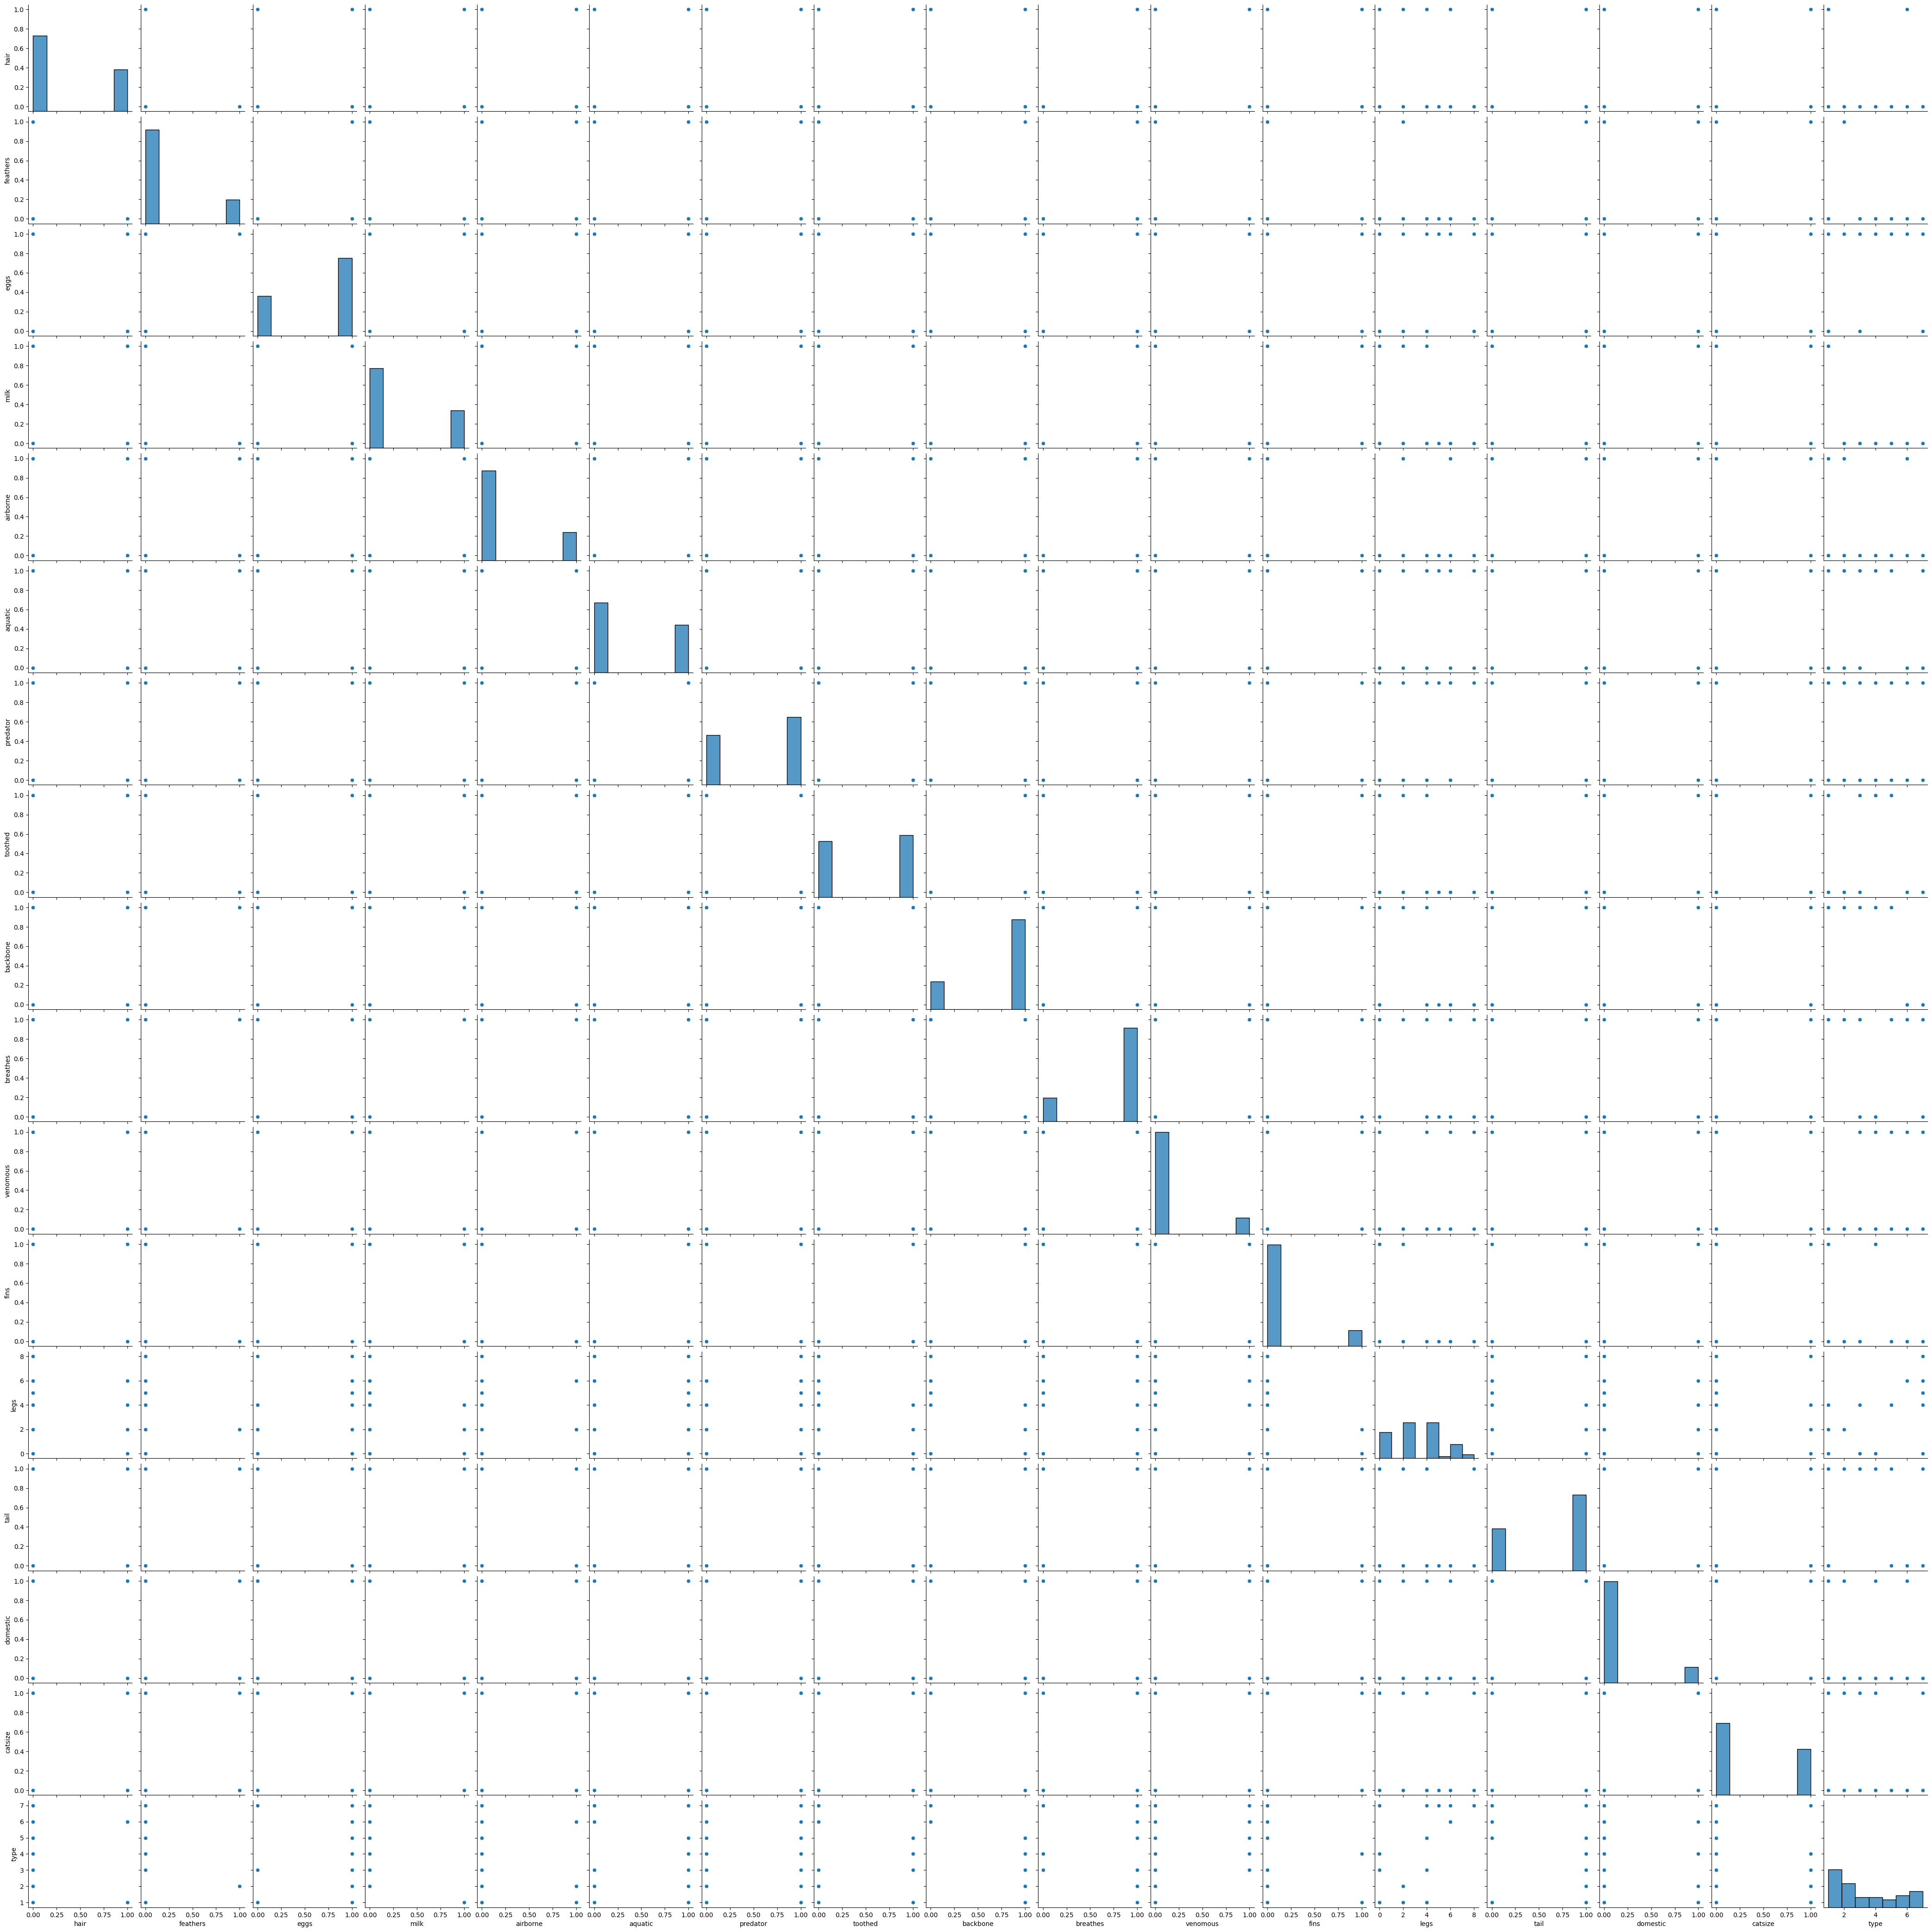

In [ ]:
sns.pairplot(data)

In [ ]:
data.corr(method='pearson')

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.375629,-0.738958,0.851344,-0.081801,-0.327336,-0.222198,0.422943,0.165011,0.375629,-0.087627,-0.087627,0.217612,-0.038847,0.325973,0.276800,-0.506624
feathers,-0.375629,1.000000,0.361847,-0.348248,0.509992,-0.075548,-0.077991,-0.531672,0.281838,0.255319,-0.200125,-0.200125,-0.212423,0.375629,-0.077132,0.114141,-0.279029
eggs,-0.738958,0.361847,1.000000,-0.885789,0.315264,0.228552,0.038072,-0.608878,-0.315264,-0.272893,0.074451,-0.030135,-0.034081,-0.158439,-0.239308,-0.308595,0.589878
milk,0.851344,-0.348248,-0.885789,1.000000,-0.299153,-0.201502,-0.069674,0.582364,0.384419,0.348248,-0.272965,0.044896,0.015825,0.133544,0.256802,0.415999,-0.692458
airborne,-0.081801,0.509992,0.315264,-0.299153,1.000000,-0.218568,-0.327968,-0.507109,-0.157143,0.281838,0.011835,-0.220911,0.138416,-0.001410,0.011835,-0.200762,0.034529
aquatic,-0.327336,-0.075548,0.228552,-0.201502,-0.218568,1.000000,0.360953,0.096032,0.056360,-0.524479,0.075159,0.478287,-0.202797,-0.032978,-0.227186,0.045565,0.214084
predator,-0.222198,-0.077991,0.038072,-0.069674,-0.327968,0.360953,1.000000,0.078002,0.005466,-0.262859,0.139243,0.139243,-0.088966,0.007285,-0.261506,0.122776,0.101018
toothed,0.422943,-0.531672,-0.608878,0.582364,-0.507109,0.096032,0.078002,1.000000,0.586894,0.025726,-0.020165,0.376407,-0.283499,0.215076,0.178121,0.133292,-0.458172
backbone,0.165011,0.281838,-0.315264,0.384419,-0.157143,0.056360,0.005466,0.586894,1.000000,0.312035,-0.244580,0.220911,-0.492674,0.667098,0.104538,0.364142,-0.845807
breathes,0.375629,0.255319,-0.272893,0.348248,0.281838,-0.524479,-0.262859,0.025726,0.312035,1.000000,-0.168856,-0.414843,0.232129,0.152040,0.077132,0.144871,-0.502188


<Axes: >

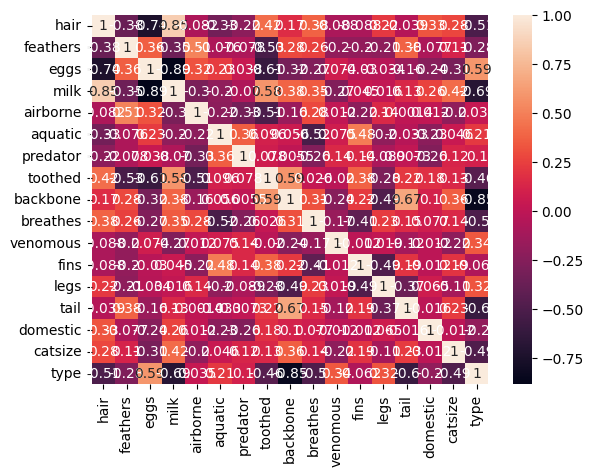

In [ ]:
sns.heatmap(data.corr(method='pearson'),annot=True)

In [ ]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.00000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,0.355932,0.203390,0.661017,0.322034,0.237288,0.40678,0.576271,0.525424,0.762712,0.796610,0.135593,0.135593,2.898305,0.644068,0.135593,0.389831,3.220339
std,0.482905,0.405975,0.477427,0.471267,0.429072,0.49545,0.498390,0.503640,0.429072,0.405975,0.345295,0.345295,2.155146,0.482905,0.345295,0.491898,2.228869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


#K-Nearest neighbours classifier

In [ ]:
# KNN Classification
from pandas import read_csv
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = data.iloc[:, 0:16]
Y = data.iloc[:, 16]


In [ ]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
5,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
7,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0


In [ ]:
Y

,type
0,1
1,1
2,4
3,1
4,1
5,4
6,1
7,2
8,7
9,7


In [ ]:
# split data into train and test sets
seed = 7
test_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


In [ ]:
# fit model no training data
model = KNeighborsClassifier()
model.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 83.33%


### Grid Search for Algorithm Tuning

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
array = data.values
X = array[:, 0:16]
Y = array[:, 16]

In [ ]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
5,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
7,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0


In [ ]:
Y

,type
0,1
1,1
2,4
3,1
4,1
5,4
6,1
7,2
8,7
9,7


In [ ]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.9484848484848485
{'n_neighbors': np.int64(1)}


### Visualizing the CV results

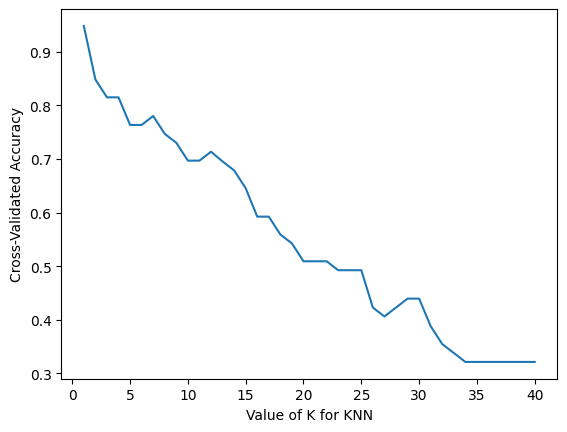

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

##Interview Questions:-
###1. Key Hyperparameters in KNN
Number of Neighbors (n_neighbors or k)

Determines how many nearest data points are considered when making a prediction.

A smaller k can lead to a model that's sensitive to noise, while a larger k may smooth out the decision boundaries too much.

Choosing an odd value for k is often recommended to avoid tie situations in classification tasks.

2.Distance Metric (metric):

Defines how the distance between data points is calculated.

Common choices include:

'euclidean': Straight-line distance.

'manhattan': Sum of absolute differences.

'minkowski': Generalization of Euclidean and Manhattan distances.

The choice of metric can impact the model's sensitivity to different feature scales.

3.Weight Function (weights):

Determines how each neighbor contributes to the prediction.

Options include:

'uniform': All neighbors contribute equally.

'distance': Closer neighbors have a greater influence.

Using distance-based weighting can improve performance, especially when there's a significant variation in neighbor distances.

4.Algorithm (algorithm):

Specifies the algorithm used to compute the nearest neighbors.

Options include:

'auto': Automatically selects the most appropriate algorithm.

'ball_tree', 'kd_tree', 'brute': Specific algorithms with different performance characteristics.

The choice can affect computation time, especially with large datasets.​
###2.  What distance metrics can be used in KNN?
1)Euclidean Distance
2)Manhattan Distance (L1 Norm)
3)Minkowski Distance
4)Hamming Distance
5)Cosine Similarity
6)Chebyshev Distance
